In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [178]:
data_batdongsan = pd.read_csv('./data_sources/batdongsan_data.csv')
data_thuviennhadat = pd.read_csv('./data_sources/thuviennhadat_data.csv')
data_chotot = pd.read_csv('./data_sources/chotot_data.csv')

data_describe_batdongsan = pd.read_csv('./data_sources/batdongsan_describe_extracted.csv')
data_describe_thuviennhadat = pd.read_csv('./data_sources/thuviennhadat_describe_extracted.csv')
# data_describe_thuviennhadat = pd.read_csv('./data_sources/thuviennhadat_describe_extracted.csv', engine='python', on_bad_lines='skip')
data_describe_chotot = pd.read_csv('./data_sources/chotot_describe_extracted.csv')

data_address_batdongsan = pd.read_csv('./data_sources/parsed_batdongsan_addresses.csv')
data_address_thuviennhadat = pd.read_csv('./data_sources/parsed_thuviennhadat_addresses.csv')
data_address_chotot = pd.read_csv('./data_sources/parsed_chotot_addresses.csv')

In [45]:
data_describe_thuviennhadat['gender_requirement'].value_counts()
data_describe_thuviennhadat['room_type'].value_counts(dropna=False)

room_type
phòng trọ         615
NaN               372
chung cư mini     130
phòng khép kín     68
phòng ghép         12
Name: count, dtype: int64

In [107]:
data_describe_batdongsan['gender_requirement'].value_counts()
data_describe_batdongsan['room_type'].value_counts(dropna=False)

room_type
NaN               43
phòng trọ         42
chung cư mini     25
phòng khép kín     4
Name: count, dtype: int64

In [179]:
data_verified = pd.read_csv('./data_sources/data_verified.csv')
data_unverified = pd.read_csv('./data_sources/data_unverified_missing.csv')

## **FILE VERIFIED (batdongsan, thuviennhadat)**

In [72]:
thuviennhadat_batdongsan = pd.concat([data_address_batdongsan, data_address_thuviennhadat], ignore_index=True)

In [73]:
thuviennhadat_batdongsan['filename'].value_counts().sort_values(ascending=False)

filename
p1-l5_20250320-000536      1
p98-l4_20250321-120549     1
p1-l0_20250320-000509      1
p1-l10_20250320-000536     1
p1-l11_20250320-000536     1
                          ..
p96-l9_20250321-120549     1
p97-l0_20250321-120549     1
p97-l10_20250321-120549    1
p97-l11_20250321-120549    1
p97-l12_20250321-120549    1
Name: count, Length: 1311, dtype: int64

In [74]:
# Merge data_verified với data_address_thuviennhadat (left join)
data_verified_merge = pd.merge(
    data_verified,
    thuviennhadat_batdongsan,
    left_on='merge_file_id',
    right_on='filename',
    how='left'  # <-- quan trọng
)


In [90]:
data_verified_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   merge_file_id   1311 non-null   object 
 1   source_post     1311 non-null   object 
 2   link            1311 non-null   object 
 3   title           1311 non-null   object 
 4   price           1311 non-null   object 
 5   area            1311 non-null   object 
 6   address_x       1311 non-null   object 
 7   start_post_day  1311 non-null   object 
 8   end_post_day    1311 non-null   object 
 9   describe        1311 non-null   object 
 10  verified        1311 non-null   bool   
 11  filename        1311 non-null   object 
 12  address_y       1311 non-null   object 
 13  Tỉnh/Thành phố  1311 non-null   object 
 14  Quận/Huyện      1311 non-null   object 
 15  Phường/Xã       1310 non-null   object 
 16  Tên đường       109 non-null    object 
 17  Số nhà          1017 non-null   o

In [ ]:
# data_verified_merge.drop(columns=['address_x', 'address_y', 'Unnamed: 0', 'filename', 'Ghi chú'], inplace=True)

In [75]:
data_verified_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   merge_file_id   1311 non-null   object 
 1   source_post     1311 non-null   object 
 2   link            1311 non-null   object 
 3   title           1311 non-null   object 
 4   price           1311 non-null   object 
 5   area            1311 non-null   object 
 6   address_x       1311 non-null   object 
 7   start_post_day  1311 non-null   object 
 8   end_post_day    1311 non-null   object 
 9   describe        1311 non-null   object 
 10  verified        1311 non-null   bool   
 11  filename        1311 non-null   object 
 12  address_y       1311 non-null   object 
 13  Tỉnh/Thành phố  1311 non-null   object 
 14  Quận/Huyện      1311 non-null   object 
 15  Phường/Xã       1310 non-null   object 
 16  Tên đường       109 non-null    object 
 17  Số nhà          1017 non-null   o

In [76]:
data_verified_merge.to_csv('data_verified_merge_no_drop.csv', index=False)

## **FILE UNVERIFIED (chotot)**

### **MERGE DATA**

In [5]:
print(data_unverified.shape)
print(data_address_chotot.shape)

(745, 8)
(745, 9)


In [180]:
# Merge data_verified với data_address_thuviennhadat (left join)
data_unverified_merge = pd.merge(
    data_unverified,
    data_address_chotot,
    left_on='merge_file_id',
    right_on='filename',
    how='left'  # <-- quan trọng
)

In [181]:
data_unverified_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   merge_file_id   745 non-null    object
 1   source_post     745 non-null    object
 2   link            745 non-null    object
 3   title           745 non-null    object
 4   price           745 non-null    object
 5   area            745 non-null    object
 6   address_x       745 non-null    object
 7   describe        745 non-null    object
 8   Unnamed: 0      745 non-null    int64 
 9   filename        745 non-null    object
 10  address_y       745 non-null    object
 11  Tỉnh/Thành phố  745 non-null    object
 12  Quận/Huyện      745 non-null    object
 13  Phường/Xã       745 non-null    object
 14  Tên đường       649 non-null    object
 15  Số nhà          725 non-null    object
 16  Ghi chú         745 non-null    object
dtypes: int64(1), object(16)
memory usage: 99.1+ KB


In [8]:
data_unverified_merge.drop(columns=['address_y', 'Unnamed: 0', 'filename', 'Ghi chú'], inplace=True)

In [9]:
data_unverified_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   merge_file_id   745 non-null    object
 1   source_post     745 non-null    object
 2   link            745 non-null    object
 3   title           745 non-null    object
 4   price           745 non-null    object
 5   area            745 non-null    object
 6   address_x       745 non-null    object
 7   describe        745 non-null    object
 8   Tỉnh/Thành phố  745 non-null    object
 9   Quận/Huyện      745 non-null    object
 10  Phường/Xã       745 non-null    object
 11  Tên đường       649 non-null    object
 12  Số nhà          725 non-null    object
dtypes: object(13)
memory usage: 75.8+ KB


In [10]:
data_unverified_merge.columns = [
    'merge_file_id', 'source_post', 'link', 'title', 'price', 'area', 'address',
    'describe', 'province/city', 'district', 'ward', 'street', 'house_number'
]

In [11]:
data_unverified_merge.sample(2)

,merge_file_id,source_post,link,title,price,area,address,describe,province/city,district,ward,street,house_number
515,p5-l2_20250404-155959,chotot,https://www.nhatot.com/thue-phong-tro-quan-6-t...,💥PHÒNG TRỌ CỬA SỔ FULL NỘI THẤT / SIÊU RẺ NGAY...,"3,5 triệu/tháng",25 m²,"Đường Võ Văn Kiệt, Phường 10, Quận 6, Tp Hồ Ch...",PHÒNG TRỌ CỬA SỔ FULL NỘI THẤT / SIÊU RẺ NGAY ...,TP. Hồ Chí Minh,Quận 6,10,Võ Văn Kiệt,10
218,p151-l6_20250404-172843,chotot,https://www.nhatot.com/thue-phong-tro-quan-3-t...,"Cho thuê phòng mặt tiền ,lầu 1 ,wc khép kín có...","3,5 triệu/tháng",15 m²,"106, Đường Nguyễn Phúc Nguyên, Phường 9, Quận ...",106 Nguyễn phúc nguyên Q3\nPhòng P101\nGiá 3.5...,TP. Hồ Chí Minh,Quận 3,húc Nguyên,Nguyễn Phúc Nguyên,106


In [12]:
data_unverified_merge.to_csv('data_unverified_merge.csv', index=False)

### **EDA**

In [182]:
data_unverified = pd.read_csv('./data_sources/data_unverified_missing.csv')
data_unverified.head(2)

,merge_file_id,source_post,link,title,price,area,address,describe
0,p1-l11_20250404-155753,chotot,https://www.nhatot.com/thue-phong-tro-quan-5-t...,Phòng cao cấp mới xây Cao Đạt,"5,4 triệu/tháng",16 m²,"Đường Cao Đạt, Phường 1, Quận 5, Tp Hồ Chí Minh",✨Phòng NỘI THẤT Cao Cấp Q5\nAddress: Cao Đạt ...
1,p135-l14_20250404-172843,chotot,https://www.nhatot.com/thue-phong-tro-huyen-nh...,"DUPLEX Đủ Nội Thất Rộng Gác Cao Gần TDTU, RMIT...","4,2 triệu/tháng",30 m²,"Đường Trần Thị Liền, Xã Phước Kiển, Huyện Nhà ...","Mình đang trống 2 phòng đủ nội thất, phòng rộn..."


In [183]:
data_unverified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   merge_file_id  745 non-null    object
 1   source_post    745 non-null    object
 2   link           745 non-null    object
 3   title          745 non-null    object
 4   price          745 non-null    object
 5   area           745 non-null    object
 6   address        745 non-null    object
 7   describe       745 non-null    object
dtypes: object(8)
memory usage: 46.7+ KB


In [15]:
data_unverified.nunique()

merge_file_id    745
source_post        1
link             745
title            745
price             69
area              29
address          418
describe         736
dtype: int64

In [16]:
data_unverified['price'].value_counts()

price
4 triệu/tháng      54
3,8 triệu/tháng    43
3,5 triệu/tháng    42
4,5 triệu/tháng    40
5 triệu/tháng      36
                   ..
950000 đ/tháng      1
8,8 triệu/tháng     1
5,6 triệu/tháng     1
7,2 triệu/tháng     1
9,5 triệu/tháng     1
Name: count, Length: 69, dtype: int64

In [184]:
data_unverified[~data_unverified['price'].str.contains('triệu/tháng')]['price'].value_counts()

price
800000 đ/tháng    13
950000 đ/tháng     1
Name: count, dtype: int64

In [185]:
# Xu li đ/tháng
data_unverified.loc[data_unverified['price'].str.contains('đ/tháng', na=False), 'price'] = '0,' + data_unverified.loc[data_unverified['price'].str.contains('đ/tháng', na=False), 'price'].str.replace('đ/tháng', 'triệu/tháng', regex=False)

# Tach so ra
data_unverified['price'] = data_unverified['price'].str.replace(',', '.').str.extract(r'([\d\.]+)')

# Chuyen type float64
data_unverified['price'] = data_unverified['price'].astype('float64')

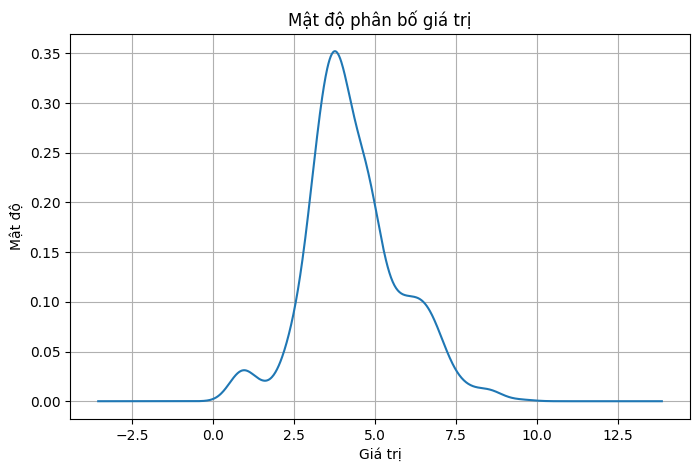

In [19]:
plt.figure(figsize=(8, 5))
data_unverified['price'].plot(kind='density')

plt.title('Mật độ phân bố giá trị')
plt.xlabel('Giá trị')
plt.ylabel('Mật độ')
plt.grid(True)
plt.show()

In [20]:
data_unverified['area'].value_counts()

area
25 m²     233
30 m²     137
20 m²     105
35 m²      78
40 m²      30
28 m²      27
15 m²      16
27 m²      15
22 m²      15
24 m²      14
18 m²      13
23 m²      10
26 m²      10
32 m²       8
50 m²       5
45 m²       5
38 m²       4
70 m²       3
60 m²       3
16 m²       2
21 m²       2
34 m²       2
80 m²       2
48 m²       1
17 m²       1
36 m²       1
200 m²      1
100 m²      1
19 m²       1
Name: count, dtype: int64

In [186]:
data_unverified['area'] = data_unverified['area'].str.extract(r'(\d+)')
data_unverified['area'] = data_unverified['area'].astype('int64')

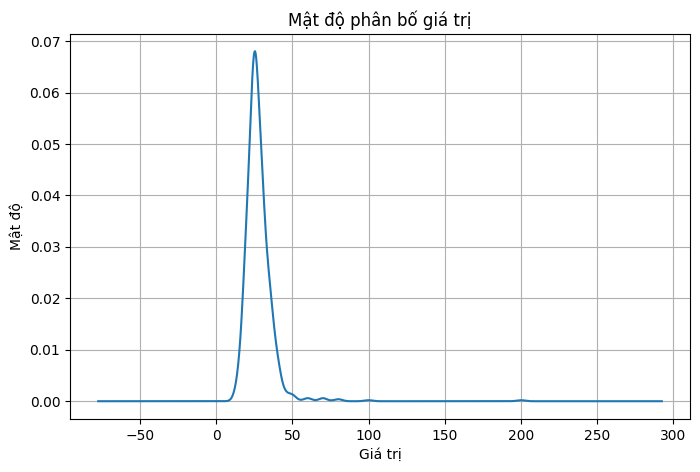

In [22]:
plt.figure(figsize=(8, 5))
data_unverified['area'].plot(kind='density')

plt.title('Mật độ phân bố giá trị')
plt.xlabel('Giá trị')
plt.ylabel('Mật độ')
plt.grid(True)
plt.show()

In [23]:
pd.set_option('display.max_rows', None)
data_unverified['address'].value_counts()

address
Đường Hòa Bình, Phường 3, Quận 11, Tp Hồ Chí Minh                                                   20
Đường Lạc Long Quân, Phường 5, Quận 11, Tp Hồ Chí Minh                                              14
Đường Lê Hồng Phong, Phường 2, Quận 10, Tp Hồ Chí Minh                                              12
Cầu Nguyễn Tri Phương, Phường 6, Quận 5, Tp Hồ Chí Minh                                             10
Đường Lý Chiêu Hoàng, Phường 10, Quận 6, Tp Hồ Chí Minh                                              9
Đường Võ Văn Kiệt, Phường 13, Quận 5, Tp Hồ Chí Minh                                                 8
Đường Lý Thường Kiệt, Phường 14, Quận 10, Tp Hồ Chí Minh                                             8
Đường An Dương Vương, Phường 9, Quận 5, Tp Hồ Chí Minh                                               7
Đường Lê Văn Sỹ, Phường 12, Quận 3, Tp Hồ Chí Minh                                                   7
Đường Nguyễn Trãi, Phường Nguyễn Cư Trinh, Quận 1, Tp Hồ Chí Minh

In [187]:
parts = data_unverified['address'].str.split(', ')
parts = parts.apply(lambda x: x[::-1])

In [188]:
address_extracted = pd.DataFrame(list(parts), columns=['province/city', 'district', 'ward', 'street', 'house_number'])

In [189]:
address_extracted = address_extracted.apply(lambda x: x.title() if isinstance(x, str) else x)

In [27]:
address_extracted.nunique()

province/city      1
district          11
ward              55
street           240
house_number      66
dtype: int64

In [28]:
address_extracted['district'].value_counts()

district
Quận 5              140
Quận 10             124
Quận 6               95
Quận 3               88
Quận 11              80
Quận 1               62
Quận 7               61
Quận 12              43
Quận 4               29
Huyện Bình Chánh     15
Huyện Nhà Bè          8
Name: count, dtype: int64

In [29]:
address_extracted['ward'].value_counts(ascending=True)

ward
Phường Thạnh Xuân           1
Phường Tân Hưng Thuận       1
Xã Phú Xuân                 1
Phường Tân Phong            1
                            1
Phường Tân Thới Hiệp        1
Phường Nguyễn Thái Bình     1
Thị trấn Nhà Bè             2
Phường Phú Mỹ               2
Phường Hiệp Thành           2
Phường Tân Chánh Hiệp       2
Phường Tân Thuận Tây        3
Phường Phạm Ngũ Lão         3
Phường Thới An              3
Phường Cầu Ông Lãnh         3
Phường Tân Hưng             3
Phường 16                   4
Phường Tân Thới Nhất        4
Phường Tân Kiểng            4
Xã Phong Phú                4
Phường Đông Hưng Thuận      4
Phường 18                   4
Phường Cô Giang             4
Phường Tân Thuận Đông       4
Xã Phước Kiển               5
Phường Cầu Kho              6
Phường Bến Nghé             6
Phường Tân Phú              6
Phường Thạnh Lộc            7
Phường An Phú Đông          7
Phường Tân Quy              7
Phường Phú Thuận            8
Phường Bến Thành            8
Phườn

In [30]:
address_extracted['street'].value_counts(ascending=True)

street
thạnh xuân 22                                 1
Đường Đông Hưng Thuận 42                      1
Nguyễn Văn Linh                               1
Đường Trần Nhân Tôn                           1
Đường Thái Phiên                              1
Hẻm 353 Đường Phạm Ngũ Lão                    1
Đường số 3                                    1
Hẻm 118 Đường Nguyễn Thị Thập                 1
Đường Tân Thới Nhất 5                         1
Đường Ký Hòa                                  1
Đường Ngã Bảy Lý Thái Tổ                      1
Cầu vượt Quang Trung 2                        1
Đường Số 52                                   1
Thiên Phước                                   1
Đường Võ Thị Phải                             1
Đường Đinh Tiên Hoàng                         1
Đường Lê Văn Khương                           1
Hàm Nghi                                      1
Đường Vành Đai                                1
Đường 36                                      1
Đường Bình Thới                  

In [190]:
# khong tim dc li do, page source describe k ghi, link da die
address_extracted[address_extracted['ward'] == '']

,province/city,district,ward,street,house_number
272,Tp Hồ Chí Minh,Quận 6,,Đường Kinh Dương Vương,None


In [191]:
# Delete row
address_extracted = address_extracted[address_extracted['ward'] != '']

In [33]:
address_extracted.isna().sum()

province/city      0
district           0
ward               0
street             0
house_number     661
dtype: int64

In [192]:
data = pd.concat([data_unverified, address_extracted], axis=1)

In [193]:
data.head(5)

,merge_file_id,source_post,link,title,price,area,address,describe,province/city,district,ward,street,house_number
0,p1-l11_20250404-155753,chotot,https://www.nhatot.com/thue-phong-tro-quan-5-t...,Phòng cao cấp mới xây Cao Đạt,5.4,16,"Đường Cao Đạt, Phường 1, Quận 5, Tp Hồ Chí Minh",✨Phòng NỘI THẤT Cao Cấp Q5\nAddress: Cao Đạt ...,Tp Hồ Chí Minh,Quận 5,Phường 1,Đường Cao Đạt,None
1,p135-l14_20250404-172843,chotot,https://www.nhatot.com/thue-phong-tro-huyen-nh...,"DUPLEX Đủ Nội Thất Rộng Gác Cao Gần TDTU, RMIT...",4.2,30,"Đường Trần Thị Liền, Xã Phước Kiển, Huyện Nhà ...","Mình đang trống 2 phòng đủ nội thất, phòng rộn...",Tp Hồ Chí Minh,Huyện Nhà Bè,Xã Phước Kiển,Đường Trần Thị Liền,None
2,p30-l2_20250404-160805,chotot,https://www.nhatot.com/thue-phong-tro-quan-7-t...,Cho thuê phòng trọ có gác. Ngay KDC Nam Long #...,3.7,25,"Đường Huỳnh Tấn Phát, Phường Tân Thuận Đông, Q...","Cho thuê phòng trọ giá có gác, có cửa sổ. Thoá...",Tp Hồ Chí Minh,Quận 7,Phường Tân Thuận Đông,Đường Huỳnh Tấn Phát,None
3,p141-l7_20250404-172843,chotot,https://www.nhatot.com/thue-phong-tro-quan-11-...,PHÒNG TRỌ GIÁ SIÊU RẺ GẦN ĐẦM SEN - ĐẠI HỌC V...,2.7,25,"Đường Hòa Bình, Phường 3, Quận 11, Tp Hồ Chí Minh","Vị Trí: Đường Hoà bình, gần Luỹ Bán Bích, Âu C...",Tp Hồ Chí Minh,Quận 11,Phường 3,Đường Hòa Bình,None
4,p1-l15_20250404-155753,chotot,https://www.nhatot.com/thue-phong-tro-quan-10-...,🏠CHO THUÊ 1 PHÒNG NGỦ MỚI 100% SÁT QUẬN 10_CỬA...,5.2,30,"Đường Lý Thường Kiệt, Phường 15, Quận 10, Tp H...",Vị Trí : Lý Thường Kiệt - Quận 10 \n( Gần ĐH B...,Tp Hồ Chí Minh,Quận 10,Phường 15,Đường Lý Thường Kiệt,None


In [194]:
data = data.apply(lambda x: x.strip() if isinstance(x, str) else x)

In [195]:
data.to_csv('final_data_unverified.csv', index=False)

## **ISOLATION FOREST**

In [49]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df = pd.read_csv('final_data_unverified.csv')
df.sample(3)

,merge_file_id,source_post,link,title,price,area,address,describe,province/city,district,ward,street,house_number
453,p30-l10_20250404-160805,chotot,https://www.nhatot.com/thue-phong-tro-quan-10-...,Studio - Duplex Thành Thái Q10 ĐH UEH,5.2,30,"Đường Thành Thái, Phường 12, Quận 10, Tp Hồ Ch...",THÀNH THÁI - Quận 10\n5.200.000-6.500.000\n\...,Tp Hồ Chí Minh,Quận 10,Phường 12,Đường Thành Thái,NaN
158,p136-l5_20250404-172843,chotot,https://www.nhatot.com/thue-phong-tro-quan-3-t...,"Balcony Lê Văn Sỹ, Bảo vệ 24/24 - thang máy gầ...",7.0,30,"Đường Lê Văn Sỹ, Phường 14, Quận 3, Tp Hồ Chí ...",Balcony Lê Văn Sỹ Quận 3\n \n Dạng phòng: Stu...,Tp Hồ Chí Minh,Quận 3,Phường 14,Đường Lê Văn Sỹ,NaN
652,p77-l15_20250404-160805,chotot,https://www.nhatot.com/thue-phong-tro-quan-5-t...,‼️ PHÒNG DUPLEX SANG TRỌNG BÌNH DÂN CỰC PHẨM‼️,4.4,28,"Đường Võ Văn Kiệt, Phường 13, Quận 5, Tp Hồ Ch...",ĐIỆN 4k\nNƯỚC 120k/ng\nPHÍ DV 150k/ng\nXe 120k...,Tp Hồ Chí Minh,Quận 5,Phường 13,Đường Võ Văn Kiệt,NaN


In [205]:
def prepare_train_data(df):
    df = df.copy()

    # --- STEP 1: Feature Engineering ---
    df['price_per_m2'] = df['price'] / df['area']
    df['district_ward'] = df['district'] + "_" + df['ward']

    # --- STEP 2: Fit encoders ---
    label_cols = ['province/city', 'district', 'ward', 'district_ward']
    encoders = {}
    for col in label_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

    # --- STEP 3: Feature interaction ---
    df['area_x_district'] = df['area'] * df['district']
    df['price_per_m2_x_district'] = df['price_per_m2'] * df['district']

    # --- STEP 4: Ward, district average price ---
    ward_avg_price = df.groupby('ward')['price_per_m2'].mean().to_dict()
    df['price_per_m2_error_vs_ward_avg'] = df['price_per_m2'] - df['ward'].map(ward_avg_price)

    district_avg_price = df.groupby('district')['price_per_m2'].mean().to_dict()
    df['price_per_m2_error_vs_district_avg'] = df['price_per_m2'] - df['district'].map(ward_avg_price)

    # --- STEP 5: Chọn feature đầu vào mô hình ---
    model_features = [
        'price_per_m2',
        'district',
        'ward',
        'district_ward',
        'area',
        'area_x_district',
        'price_per_m2_x_district',
        'price_per_m2_error_vs_ward_avg',
        'price_per_m2_error_vs_district_avg'
    ]
    df_model = df[model_features]

    # --- STEP 6: Scale ---
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_model)

    # --- STEP 7: Train Isolation Forest ---
    model = IsolationForest(contamination=0.05, random_state=42)
    model.fit(df_scaled)

    return model, scaler, encoders, ward_avg_price, district_avg_price

In [210]:
def predict_anomaly(input_df, encoders, scaler, model, ward_avg_price, district_avg_price):
    df = input_df.copy()

    # Bước 1: Feature Engineering
    df['price_per_m2'] = df['price'] / df['area']

    # Tổ hợp district_ward để encode sau
    df['district_ward'] = df['district'] + "_" + df['ward']

    # Tương tác
    for col in ['province/city', 'district', 'ward', 'district_ward']:
        if df[col][0] not in encoders[col].classes_:
            return {"error": f"⚠️ Giá trị '{df[col][0]}' chưa từng thấy trong encoder '{col}'"}
        df[col] = encoders[col].transform(df[col])

    # Các đặc trưng tương tác
    df['area_x_district'] = df['area'] * df['district']
    df['price_per_m2_x_district'] = df['price_per_m2'] * df['district']
    df['price_per_m2_error_vs_ward_avg'] = df['price_per_m2'] - df['ward'].map(ward_avg_price).fillna(df['price_per_m2'].mean())
    df['price_per_m2_error_vs_district_avg'] = df['price_per_m2'] - df['district'].map(district_avg_price).fillna(df['price_per_m2'].mean())

    # Chọn các đặc trưng cần cho model
    selected_features = [
        'price_per_m2',
        'district',
        'ward',
        'district_ward',
        'area',
        'area_x_district',
        'price_per_m2_x_district',
        'price_per_m2_error_vs_ward_avg',
        'price_per_m2_error_vs_district_avg'
    ]

    df_model = df[selected_features]

    # Bước 2: Scale
    df_scaled = scaler.transform(df_model)

    # Bước 3: Anomaly score & kết quả
    score = model.decision_function(df_scaled)[0]
    result = model.predict(df_scaled)[0]

    # Phân loại theo score
    if score > 0.1:
        risk = "✅ Rất an toàn"
    elif score > 0:
        risk = "✅ Bình thường"
    elif score > -0.05:
        risk = "⚠️ Hơi nghi ngờ"
    else:
        risk = "🚨 Bất thường rõ ràng"

    return {
        "result": "✅ Bình thường" if result == 1 else "⚠️ Bất thường",
        "anomaly_score": round(score, 5),
        "risk_level": risk
    }

In [217]:
model, scaler, encoders, ward_avg_price, district_avg_price = prepare_train_data(df)

In [219]:
new_input = pd.DataFrame([{
    'price': 5.0,
    'area': 10,
    'province/city': 'Tp Hồ Chí Minh',
    'district': 'Quận 5',
    'ward': 'Phường 1',
}])

predict_anomaly(new_input, encoders, scaler, model, ward_avg_price, district_avg_price)


{'result': '⚠️ Bất thường',
 'anomaly_score': np.float64(-0.14007),
 'risk_level': '🚨 Bất thường rõ ràng'}